In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [7]:
df = pd.read_csv('nyc_census_tracts.csv')
print('dataframe shape: ', df.shape)
df.head()

dataframe shape:  (2167, 36)


,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [8]:
# So there are 2176 rows for the data and 36 columns. We probably don't need all columns.

df.columns

Index(['CensusTract', 'County', 'Borough', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [9]:
# They all look pretty usefull potentially. CensusTract looks like just an ID so useless.
df = df.drop(columns = 'CensusTract')
df.head()

,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,1.6,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,4.2,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,2.1,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


#EDA

In [10]:
# visualization stuffs
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# sns.pairplot(df)
# Can't run this because the values are too big

In [12]:
df.describe()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,Income,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,2167.000000,2167.000000,2167.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2167.000000,2101.000000,...,2124.000000,2124.000000,2124.000000,2106.000000,2167.000000,2124.000000,2124.00000,2124.000000,2124.000000,2125.000000
mean,3888.667743,1852.812183,2035.855561,26.624671,33.055827,23.950799,0.198590,13.442622,2436.468389,59101.320800,...,9.048070,2.306921,3.749105,40.831576,1813.498385,79.536205,14.19355,6.151271,0.118644,9.757788
std,2240.050968,1063.921420,1212.765249,22.662106,30.421463,29.476758,0.700418,16.446275,1538.399585,28802.662945,...,9.623892,2.872501,4.560174,7.105916,1180.593180,6.923979,7.23155,3.851846,0.391563,5.786948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9829.000000,...,0.000000,0.000000,0.000000,15.200000,0.000000,38.600000,0.00000,0.000000,0.000000,0.000000
25%,2359.500000,1113.000000,1224.500000,9.000000,4.100000,1.500000,0.000000,2.100000,1446.000000,39073.000000,...,3.300000,0.500000,1.300000,37.200000,1052.500000,75.000000,8.80000,3.500000,0.000000,5.900000
50%,3550.000000,1699.000000,1848.000000,18.400000,22.950000,7.800000,0.000000,6.700000,2140.000000,54505.000000,...,6.500000,1.500000,2.800000,41.400000,1579.000000,79.900000,13.30000,5.600000,0.000000,8.800000
75%,4957.500000,2360.500000,2571.500000,39.900000,60.100000,39.075000,0.000000,18.925000,2976.000000,73272.000000,...,10.800000,3.200000,5.100000,45.375000,2273.500000,84.400000,18.70000,8.200000,0.000000,12.600000
max,28926.000000,13460.000000,15466.000000,100.000000,100.000000,100.000000,11.300000,89.800000,22905.000000,244375.000000,...,100.000000,55.600000,100.000000,70.500000,12780.000000,100.000000,53.70000,61.400000,3.900000,100.000000


In [13]:
df.groupby('Borough').sum()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,Income,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
Borough,,,,,,,,,,,,,,,,,,,,,
Bronx,1428357,672447,755910,17626.4,4340.0,9735.6,68.9,1270.2,820317,12933386.0,...,2684.6,584.6,1116.7,14023.6,563903,26862.7,4887.5,1710.3,39.1,4635.0
Brooklyn,2595259,1229001,1366258,13709.8,28013.5,23530.0,136.5,8292.2,1601527,40590155.0,...,6524.2,1732.3,2771.7,31333.4,1167448,59081.0,11209.4,4635.1,73.6,7469.0
Manhattan,1629507,769434,860073,6408.9,13638.9,3927.5,63.5,3460.1,1156936,22921786.0,...,6117.9,1479.8,2027.7,8579.5,884457,23395.7,2476.8,2181.1,46.4,2257.3
Queens,2301139,1115459,1185680,16909.4,17770.7,12603.8,144.3,14746.9,1367889,40020276.0,...,3553.5,1005.2,1744.3,27541.0,1104930,51552.3,9291.6,4070.7,85.5,5601.7
Staten Island,472481,228703,243778,2002.8,6579.7,1170.4,9.4,836.5,333158,7706272.0,...,337.9,98.0,302.7,4513.8,209113,8043.2,2281.8,468.1,7.4,772.3


In [16]:
# Bar Charts
df.groupby('Borough').sum()['WorkAtHome'].index.tolist()

['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [20]:
df.groupby('Borough').sum()['WorkAtHome'].values.round().tolist()

[1117.0, 2772.0, 2028.0, 1744.0, 303.0]

In [21]:
names_list = df.groupby('Borough').sum()['WorkAtHome'].index.tolist()

In [23]:
values_list = df.groupby('Borough').sum()['WorkAtHome'].values.round().tolist()

Text(0.5, 1.0, 'Total Working At Home In NYC')

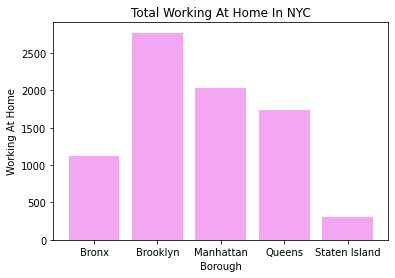

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(np.arange(len(values_list)), values_list, align='center', alpha=0.7, color='violet')
plt.xticks(np.arange(len(names_list)), names_list)
plt.ylabel('Working At Home')
plt.xlabel('Borough')
plt.title('Total Working At Home In NYC')


It looks like in Staten Island not many work from home. Where do they work?